OVERVIEW:

Dating apps have become one of the leaders if not the leader in how one searches for romantic partnerships. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people search for romance.


DATASET:

profiles.csv, provided by Codecademy

SCOPE:

Utilizing a dataset of OKCupid users and the skills developed through Codecademy, the hope is to provide a deeper understanding and offer insight to the users of OKCupid.  The questions I hope to answer:

Can a users' astrological signs be predicted using other variables from their profiles?

Can a users' alcohol consumption or drug use be predicted based on their education levels?

Are there common conversation starters users hope to employ and can we predict those from other variables?

In [1]:
#General Use Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6,6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

LOADING THE DATA:

Using pandas, the user profiles from OKCupid will be loaded into Python as a DataFrame object to be explored and eventually visualized.

The dataset, profiles.csv, is loaded into a variable called profiles, and will be examined using various Python methods.

In [2]:
profiles = pd.read_csv('profiles.csv', encoding = 'utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
print(profiles.columns)
profiles.last_online.head()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

DATA CHARACTERISTICS:

The columns of the dataset are:

    age: continuous variable of user's age
    body_type: categorical variable of user's body type
    diet: categorical variable of dietary information
    drinks: categorical variable of alcohol consumption
    drugs: categorical variable of drug usage
    education: categorical variable of highest education level attained
    ethnicity: categorical variable of ethnic backgrounds
    height: continuous variable of user's height
    income: continuous variable of user's income
    job: categorical variable of employment
    offspring: categorical variable describing user's desire for children
    orientation: categorical variable of user's sexual orientation
    pets: categorical variable of pet preferences
    religion: categorical variable of religious background
    sex: categorical variable of gender
    sign: categorical variable of astrological symbol
    smokes: categorical variable of smoking consumption
    speaks: categorical variable of languages spoken
    status: categorical variable of relationship status
    last_online: date variable of last login
    location: categorical variable of user locations

These columns are short-answer open responses

    essay0: Self Summary
    essay1: What am I doing with my life
    essay2: What am I really good at
    essay3: The first thing people notice about me
    essay4: Favorites; books, movies, shows, music, food, etc.
    essay5: What are six things you could never do without
    essay6: I spend a lot of time thinking about
    essay7: On a typical Friday night I am
    essay8: The most private thing I am willing to admit
    essay9: You should message me if...

EXPLORE THE DATA:

We first want to answer: Can a users' astrological signs be predicted using other variables from their profiles?

So, first let's expore the unique signs, and the categories assigned to them in case there are qualifier's like "but it doesn't matter" which was seen in the .head() call.

    With the print statements below we see there are 48 categories, more than the expected 12 zodiac signs.  This is due to the qualifiers added as noted above.

In [4]:
#Save the columns of the dataset as a list for future uses
profiles_lst = list(profiles.columns)
print('Number of categories:', profiles.sign.nunique())
print('Star sign categories:', profiles.sign.unique())

Number of categories: 48
Star sign categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries

CLEAN LABELS:

We should clean labels down to the expected 12 zodiac signs. Data for each sign split based qualifier's created by the user is intriguing and saved to a separate list.

In [5]:
zodiac_sign = []
qualifiers = []
for item in profiles['sign']:
    if isinstance(item, str): # Check if the item is a string
        parts = item.split(' ', 1) # Split at the first space
        zodiac_sign.append(parts[0]) # Add the zodiac sign to their list
        qualifiers.append(parts[1] if len(parts) > 1 else '') # Add the qualifiers to their list
    else:
        zodiac_sign.append(np.nan) # Preserve NaN values to later, hopefully, use a ML classifier for imputation
        qualifiers.append(np.nan)

profiles['zodiac_sign'] = zodiac_sign
profiles['sign_qualifiers'] = qualifiers

print('Number of Zoidac Signs', profiles.zodiac_sign.nunique())
print('Categories:', profiles.zodiac_sign.unique())

print('Number of qualifiers:', profiles.sign_qualifiers.nunique())
#print('Categories:', profiles.sign_qualifiers.unique())

print(profiles.zodiac_sign.value_counts())
zodiac_nan = profiles['zodiac_sign'].isna().sum()
print(zodiac_nan)

Number of Zoidac Signs 12
Categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
Number of qualifiers: 4
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: zodiac_sign, dtype: int64
11056


CONTINUOUS VARIABLES:

The continuous variables are; age, height, and income. Using seaborn to visualize the data and understand the dataset's users a little better.

    Interesting to note that sex is a binary choice, [m, f] with 0 NaN values

Text(0.5, 1.03, 'Age of Users (yr)')

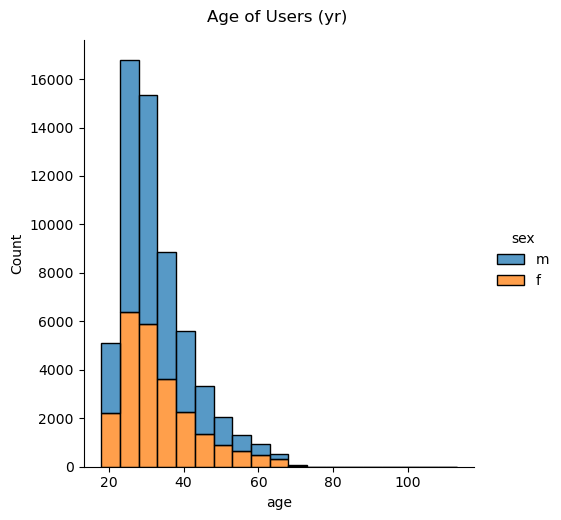

In [6]:
# Distribution of user profiles with gender splits shown as stacked bins.

# First is age distribution which appears to be left skewed, so more younger people
# which tracks for a dating app's user population
plot_age = sns.displot(data=profiles, x = 'age', hue = 'sex', kind = 'hist', binwidth = 5, multiple = 'stack')
plot_age.figure.suptitle('Age of Users (yr)', y=1.03)


Text(0.5, 1.03, 'Height of Users (in)')

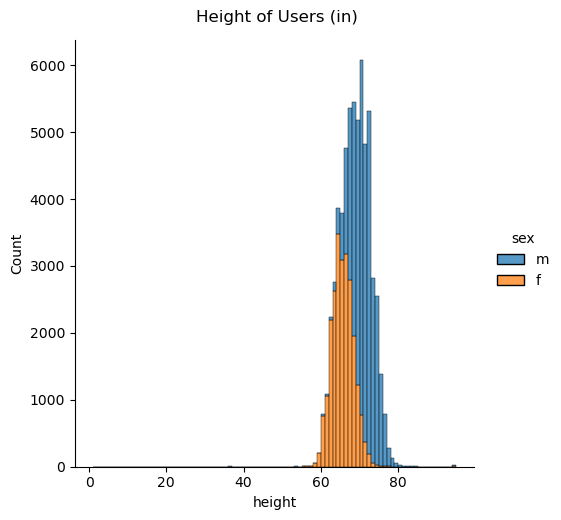

In [7]:
# Next up is height distribution
# Heights appear normally distributed though anecdotally men appear to be listing
# their heights as close to 6 feet as possible...
plot_height = sns.displot(data = profiles, x = 'height', hue = 'sex', kind = 'hist', binwidth = 1, multiple  = 'stack')
plot_height.figure.suptitle('Height of Users (in)', y=1.03)



Text(0.5, 1.03, 'Income of Users ($)')

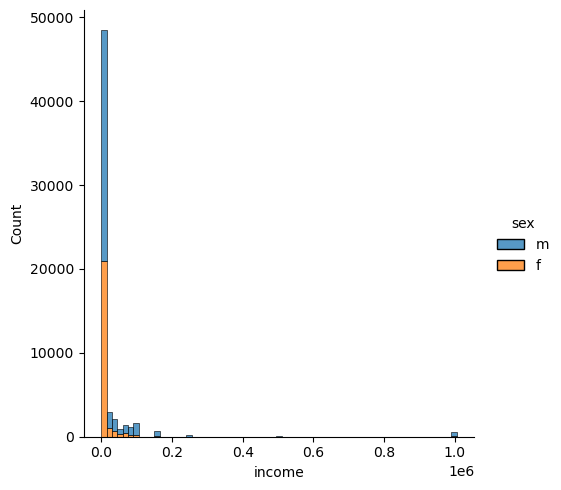

In [8]:
# Final distribution for continuous variables is Income distribution
# There appears to be an outlier here way off to the right, an income of 1,000,000
# Think about filtering income range if we want to use it in our predictions
plot_income = sns.displot(data=profiles, x = 'income', hue = 'sex', kind = 'hist', binwidth = 15000, multiple = 'stack')
plot_height.figure.suptitle('Income of Users ($)', y=1.03)

#print(profiles.sex.unique())
#sex_nan = profiles['sex'].isna().sum()
#print(sex_nan)


DISCRETE VARIABLES:

Our discrete variables are as follows:

    sex, body type, diet, drinks, drugs, education, jobs, offspring, orientation, pets, religion, signs, smoking, status.

Some will be more useful than others, but visualizing them and cleaning up their data when necessary will allow easier, and more efficient computations later.

<Axes: xlabel='count', ylabel='sex'>

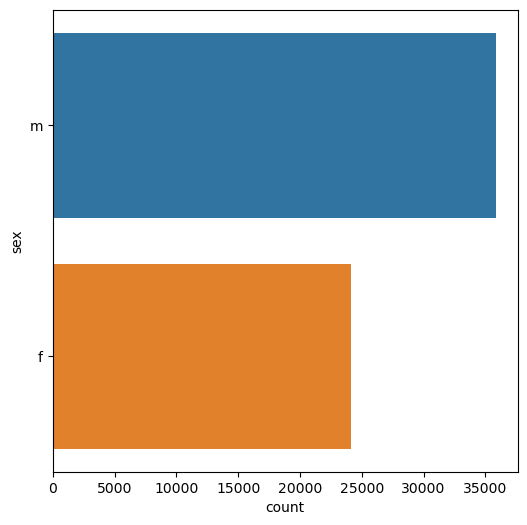

In [9]:
# We previously found that sex is a binary choice for this dataset with 0 NaN values
# meaning all of the collected user information filled out one or the other or was
# cherry-picked from cis-gendered users.

sns.countplot(data = profiles, y ='sex')

<Axes: xlabel='count', ylabel='orientation'>

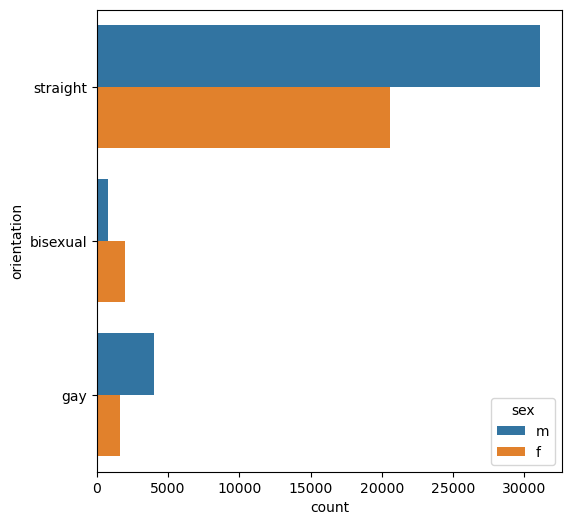

In [10]:
# Sexual orientation of users as simply defined as gender
# There is at least some users identifying as gay and bisexual but the majority
# of both men and women identify as straight.

sns.countplot(data = profiles, y = 'orientation', hue = 'sex')

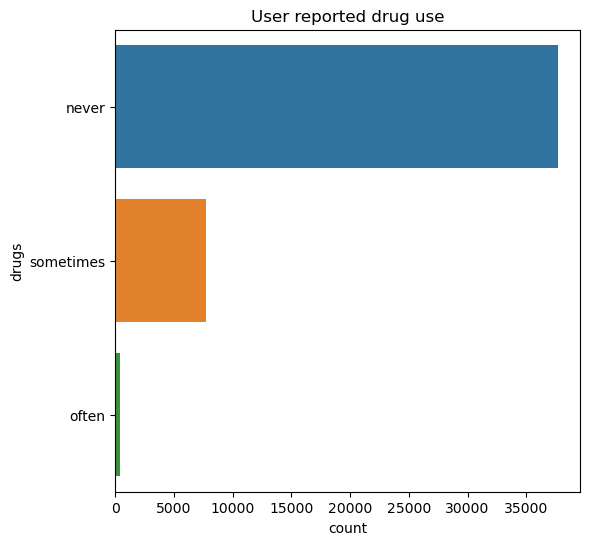

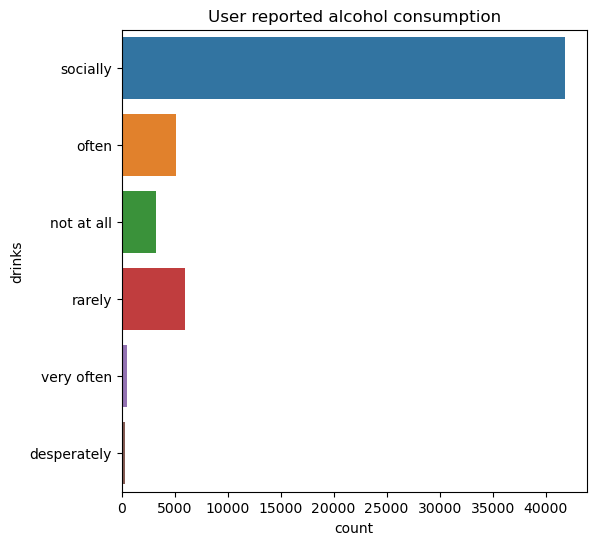

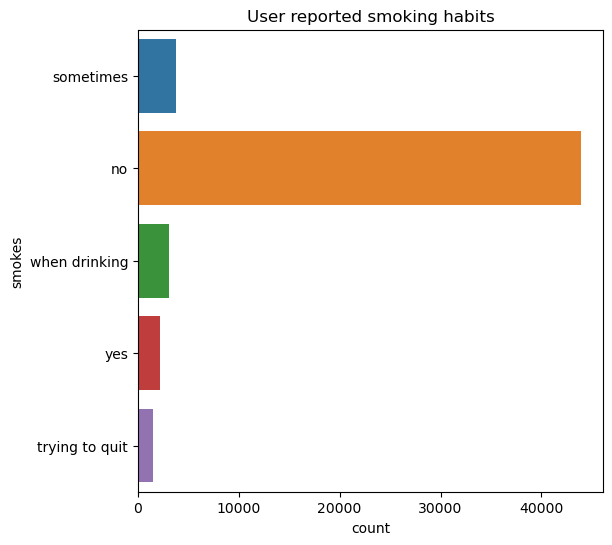

In [11]:
# Drug use, alcohol, and smoking are all grouped together since they are similar
# extra-curricular activities for lack of a better descriptor.

sns.countplot(data = profiles, y ='drugs')
plt.title('User reported drug use')
plt.show()
sns.countplot(data = profiles, y ='drinks')
plt.title('User reported alcohol consumption')
plt.show()
sns.countplot(data = profiles, y ='smokes')
plt.title('User reported smoking habits')
plt.show()

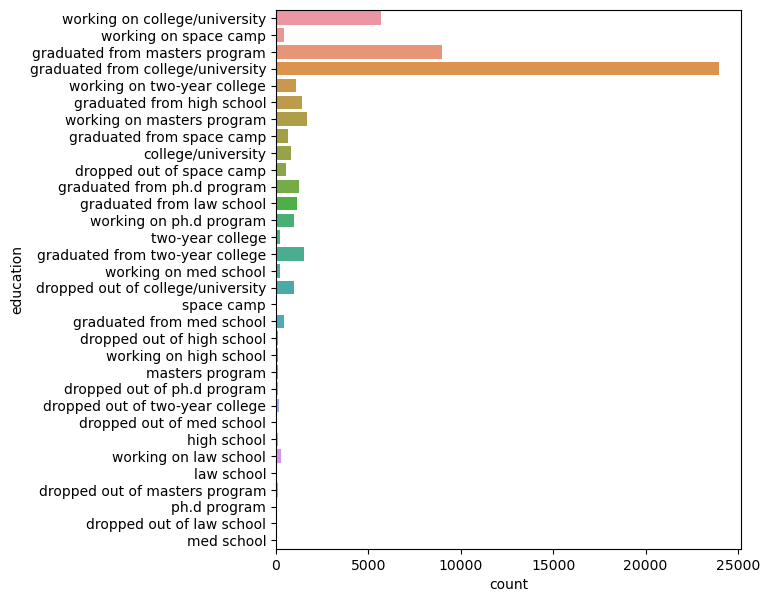

32


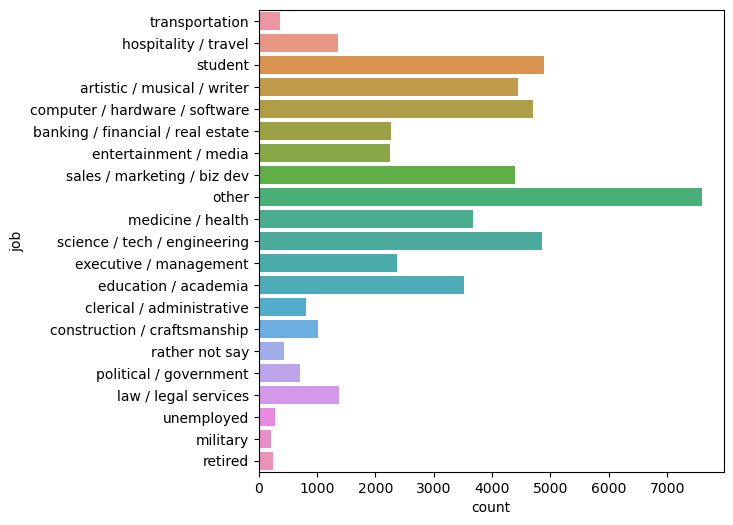

21


In [12]:
# Next is education.
# There are 32 unique options for education inputs including whimiscal options
# like space camp.  This feature doesn't seem to be full of serious responses
# perhaps reframing the second question in the scope to be employment based and
# not education based is a better avenue to explore.

plt.figure(figsize = (6,7))
sns.countplot(data = profiles, y ='education')
plt.show()

print(profiles.education.nunique())

sns.countplot(data=profiles, y="job")
plt.show()

print(profiles.job.nunique())

# There are 21 unique job obtions and if the same space camp graduates are finding
# their whimsy here it appears those choices are consolidated in an "other" category

<Axes: xlabel='count', ylabel='diet'>

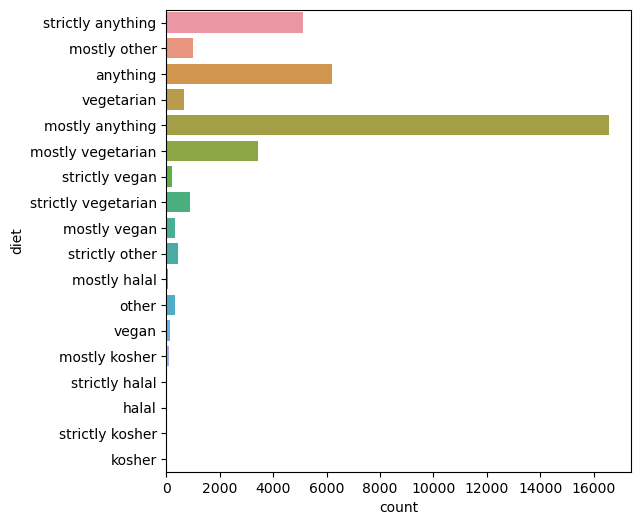

In [13]:
# Diet
# It appears that open-mindedness is a desirable trait to display since the
# majority of responses are open to anything, (strictly anything, anything, 
# and mostly anything being clear majorities here)

sns.countplot(data=profiles, y="diet")

<Axes: xlabel='count', ylabel='religious_beliefs'>

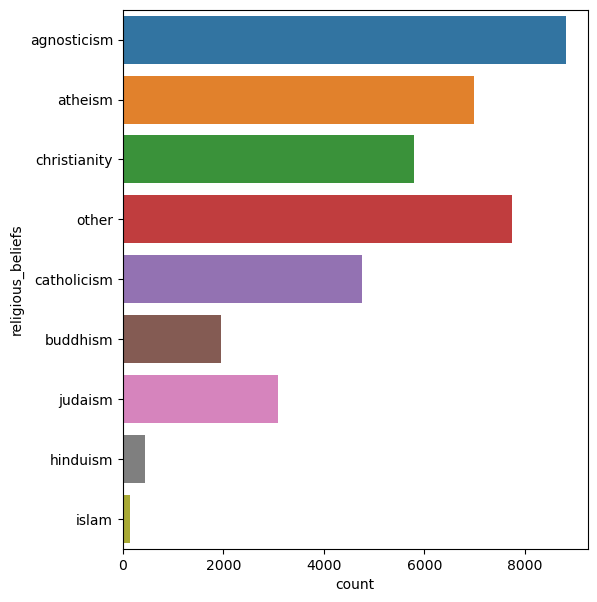

In [14]:
# Religion
# I imagine religion will fall similarly to the zodiac signs since some people will
# put more faith into the category than the others.

#print('Religion categories:', profiles.religion.unique())
# So let's clean up the data similarly
religious_belief = []
rb_qualifiers = []
for item in profiles['religion']:
    if isinstance(item, str): # Check if the item is a string
        parts = item.split(' ', 1) # Split at the first space
        religious_belief.append(parts[0]) # Add the zodiac sign to their list
        rb_qualifiers.append(parts[1] if len(parts) > 1 else '') # Add the qualifiers to their list
    else:
        religious_belief.append(np.nan) # Preserve NaN values to later, hopefully, use a ML classifier for imputation
        rb_qualifiers.append(np.nan)

profiles['religious_beliefs'] = religious_belief
profiles['rb_qualifiers'] = rb_qualifiers

plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="religious_beliefs")


['' "but it doesn't matter" nan "and it's fun to think about"
 'and it matters a lot']


<Axes: xlabel='count', ylabel='sign_qualifiers'>

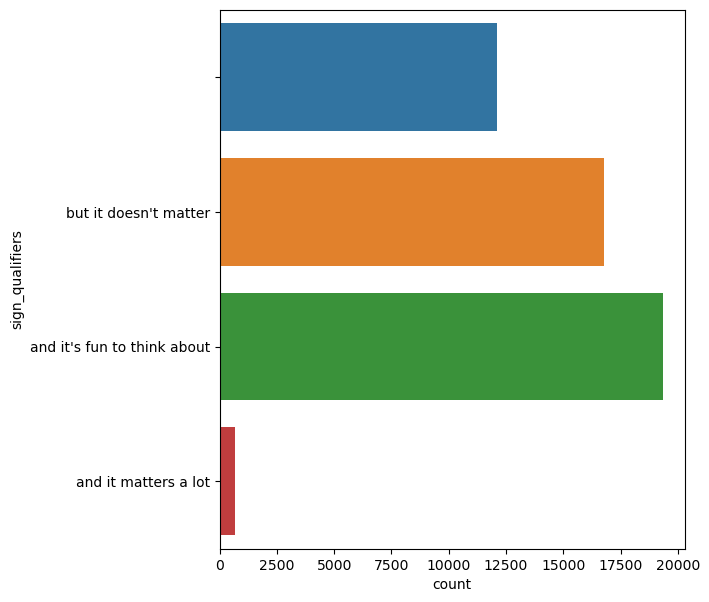

In [15]:
# Finally let's look at the qualifiers that were stripped from zodiac sign data
# earlier.  The unlabeled bar is NaN values, but the rest of the respondents don't
# take astrology too seriously.

profiles['sign_qualifiers'] = profiles['sign_qualifiers'].str.replace('&rsquo;', "'")
print(profiles.sign_qualifiers.unique())
plt.figure(figsize=(6,7))
sns.countplot(data=profiles, y="sign_qualifiers")

DATA PREPARATION:

Some preparations have been done--the zodiac sign and religion data being cleaned--but now we should evaluate what data is missing and is there still enough to predict for ML imputation.

In [16]:
# Finding features with largest amount of NaN values and consolidating the dataset 
# into the columns believed to be good predictors for astrological signs.
profiles.isnull().sum()

# # Remove the columns of essay responses to create a correlation matrix of just the 
# # continuous and descrete variables
# essay_responses = [f'essay{i}' for i in range(10)]
# profiles_no_essay = profiles.drop(columns = essay_responses)
# print(profiles_no_essay.columns)
# # Now we still have duplicate columns for zodiac signs, religions, and the qualifiers 
# # attached to those values.  We should drop both original religion, and zodiac signs
# # and the qualifier columns.

# # Drop 'sign' 'religion' 'sign_qualifiers' 'rb_qualifiers' 'last_online' 'location' 'speaks'
# duplicates = ['sign', 'religion', 'sign_qualifiers', 'rb_qualifiers','last_online', 'location', 'speaks']
# profiles_clean = profiles_no_essay.drop(columns = duplicates)

# # Drop rows with NaN values
# profiles_dropped = profiles_clean.dropna()

# # Sample 105 of the data
# profiles_sampled = profiles_dropped.sample(frac = 0.01, random_state = 1)

# # One-hot encode categorical variables
# profiles_encoded = pd.get_dummies(profiles_sampled, drop_first=True)

# # Calculate the correlation matrix
# correlation_matrix = profiles_encoded.corr()

# # Create heatmap to evaluate which features are redundant
# plt.figure(figsize = (10, 8))
# sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm', fmt = '.2f')
# plt.title('Correlation Heatmap')
# plt.show()




age                      0
body_type             5296
diet                 24395
drinks                2985
drugs                14080
education             6628
essay0                5488
essay1                7572
essay2                9638
essay3               11476
essay4               10537
essay5               10850
essay6               13771
essay7               12451
essay8               19225
essay9               12603
ethnicity             5680
height                   3
income                   0
job                   8198
last_online              0
location                 0
offspring            35561
orientation              0
pets                 19921
religion             20226
sex                      0
sign                 11056
smokes                5512
speaks                  50
status                   0
zodiac_sign          11056
sign_qualifiers      11056
religious_beliefs    20226
rb_qualifiers        20226
dtype: int64

The rest of the previous cell is commented out because the dataset size and sheer number of categorical variables after OHE encoding rendered the resulting heatmap nearly illegible and taking quite a bit of time to compute. 

My quick thoughts on that heatmap is that none of the features in our dataset are correlated closely with zodiac sign and we may not be able to predict a user's zodiac sign without information more closely correlated with the user's sign, like birth month.

Reducing the number of features to a subset of variables will make the model more computationally efficient while still rendering worthwhile predictions hopefully.

In [17]:
cols = ['body_type', 'diet', 'job', 'orientation', 'pets', 'religious_beliefs', 'sex']
profiles_df = profiles[cols + ['zodiac_sign']].dropna()
profiles_df = pd.get_dummies(profiles_df, columns = cols, drop_first=True)

profiles_df.head()

,zodiac_sign,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,body_type_skinny,...,pets_likes dogs and likes cats,religious_beliefs_atheism,religious_beliefs_buddhism,religious_beliefs_catholicism,religious_beliefs_christianity,religious_beliefs_hinduism,religious_beliefs_islam,religious_beliefs_judaism,religious_beliefs_other,sex_m
0,gemini,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,cancer,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,taurus,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
7,sagittarius,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9,cancer,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


CHECK FOR LABEL IMBALANCE:

With multi-class problems having a large disparity between 1 or more classes can yield weighted predictive results toward the more prevalent class.

In the given dataset, we can see that all classes are relatively equally represented so worrying about label imbalance for zodiac signs isn't a concern.

In [18]:
profiles_df.zodiac_sign.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: zodiac_sign, dtype: int64

SPLITTING DATA:

With data cleaned and dummy categories created now we need to split data into the training and test sets with zodiac_signs as the labels we hope to predict.

In [21]:
# Setting predictor features (X) with prediction labels (y0)
X = profiles_df.drop(columns = ['zodiac_sign'])
y = profiles_df['zodiac_sign']

# Creating training sets reserving 20% of the whole dataset for testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

# Ensure y_train, and y_test are compatible with sklearn machine learning models by making them 1-d arrays
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()


(16453, 74)


PREDICTION:

Model Building:

For the first part of the project the three models from scikit used are; Logistic Regression, Decision Trees, and KNN.  All three are loaded at the beginning of the file for standardization.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report 

EVALUATION METRICS:

With the model training and testing we will be using the following values to evaluate each model's effectiveness with our dataset.

    Accuracy - The total correct predictions (TP+TN) divided by the total number of predictions (TP+TN+FN+FP)
    Precision - The total correct positive predictions (TP) divided by the number of positive predictions (TP+FP)
    Recall - The total correct positive predictions (TP) divided by the number of actual positives (TP+FN)
    F1-Score - The harmonic mean of precision and recall, providing a balance between the two.
    Macro Avg -
    Weighted Avg -
    Support -



LOGISTIC REGRESSION

The first model tested is logistic regression, called with multi-class = 'multinomial' argument.  We will fit the model lr_model to our dataset and collect evaluation metrics to compare its performance to other test models.

The classification report for lr_model shows the accuarcy is ~9% which is effectively guessing (1/12 choices for zodiac signs or ~8%).

In [31]:
lr_model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09      1016
       aries       0.12      0.10      0.11      1049
      cancer       0.14      0.23      0.17      1177
   capricorn       0.11      0.06      0.08       959
      gemini       0.11      0.11      0.11      1186
         leo       0.13      0.22      0.16      1186
       libra       0.13      0.10      0.11      1073
      pisces       0.12      0.11      0.11      1077
 sagittarius       0.11      0.10      0.10      1065
     scorpio       0.09      0.03      0.05      1095
      taurus       0.11      0.12      0.11      1110
       virgo       0.12      0.19      0.14      1169

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



K NEAREST NEIGHBOR:

The next model fit and tested will be the KNeighborsClassifier where we'll set the number of neighbors to 20 as a base up from the default of 5 neighbors.  If the classification report shows promise tuning the number of neighbors will be a future step.

The classification report for knn_model shows the accuracy is ~9% which again is effectively guessing at ~8%.

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.08      0.11      0.09       246
       aries       0.10      0.14      0.11       279
      cancer       0.11      0.18      0.14       280
   capricorn       0.09      0.09      0.09       238
      gemini       0.09      0.11      0.10       310
         leo       0.07      0.07      0.07       330
       libra       0.07      0.05      0.06       281
      pisces       0.07      0.07      0.07       257
 sagittarius       0.08      0.06      0.07       247
     scorpio       0.09      0.07      0.08       261
      taurus       0.08      0.05      0.06       280
       virgo       0.12      0.08      0.09       282

    accuracy                           0.09      3291
   macro avg       0.09      0.09      0.09      3291
weighted avg       0.09      0.09      0.09      3291



The final model will be a DecisionTreeClassifier, dt_model.  We'll start with no limit on the number of branches in hopes that the classifier will converge and have some level of success greater than guessing.

The classification report for dt_model shows the accuracy is ~9% again.

In [32]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

    aquarius       0.66      0.93      0.77      1016
       aries       0.67      0.88      0.76      1049
      cancer       0.72      0.86      0.78      1177
   capricorn       0.70      0.82      0.76       959
      gemini       0.76      0.80      0.78      1186
         leo       0.79      0.80      0.80      1186
       libra       0.77      0.77      0.77      1073
      pisces       0.84      0.72      0.77      1077
 sagittarius       0.87      0.71      0.78      1065
     scorpio       0.90      0.69      0.78      1095
      taurus       0.92      0.67      0.78      1110
       virgo       0.90      0.66      0.77      1169

    accuracy                           0.78     13162
   macro avg       0.79      0.78      0.77     13162
weighted avg       0.79      0.78      0.78     13162



With all three models performing poorly with exactly the same accuracy results my first inclination is that I've messed up implementing the models in some way.  

So I'll test each model on the training data to see if the models are working as expected before concluding that the available data isn't suited to predicting zodiac symbols of the users.

In [33]:
lr_test = lr_model.predict(X_train)
print(classification_report(y_train, lr_test))

# Accuracy improved to 12%, still bad but at least the model is fit properly

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09      1016
       aries       0.12      0.10      0.11      1049
      cancer       0.14      0.23      0.17      1177
   capricorn       0.11      0.06      0.08       959
      gemini       0.11      0.11      0.11      1186
         leo       0.13      0.22      0.16      1186
       libra       0.13      0.10      0.11      1073
      pisces       0.12      0.11      0.11      1077
 sagittarius       0.11      0.10      0.10      1065
     scorpio       0.09      0.03      0.05      1095
      taurus       0.11      0.12      0.11      1110
       virgo       0.12      0.19      0.14      1169

    accuracy                           0.12     13162
   macro avg       0.12      0.12      0.11     13162
weighted avg       0.12      0.12      0.11     13162



In [34]:
knn_test = knn_model.predict(X_train)
print(classification_report(y_train, knn_test))

# Accuracy is now 20% which is markedly better but still quite poor

              precision    recall  f1-score   support

    aquarius       0.18      0.25      0.21      1016
       aries       0.17      0.26      0.21      1049
      cancer       0.19      0.30      0.23      1177
   capricorn       0.18      0.18      0.18       959
      gemini       0.20      0.25      0.22      1186
         leo       0.20      0.22      0.21      1186
       libra       0.19      0.17      0.18      1073
      pisces       0.19      0.16      0.17      1077
 sagittarius       0.21      0.14      0.17      1065
     scorpio       0.20      0.13      0.16      1095
      taurus       0.23      0.12      0.16      1110
       virgo       0.25      0.16      0.19      1169

    accuracy                           0.20     13162
   macro avg       0.20      0.19      0.19     13162
weighted avg       0.20      0.20      0.19     13162



In [36]:
dt_test = dt_model.predict(X_train)
print(classification_report(y_train, dt_test))

# Accuracy is up to 78% which is much better and to be expected since decision
# trees tend to overfit the data.

              precision    recall  f1-score   support

    aquarius       0.66      0.93      0.77      1016
       aries       0.67      0.88      0.76      1049
      cancer       0.72      0.86      0.78      1177
   capricorn       0.70      0.82      0.76       959
      gemini       0.76      0.80      0.78      1186
         leo       0.79      0.80      0.80      1186
       libra       0.77      0.77      0.77      1073
      pisces       0.84      0.72      0.77      1077
 sagittarius       0.87      0.71      0.78      1065
     scorpio       0.90      0.69      0.78      1095
      taurus       0.92      0.67      0.78      1110
       virgo       0.90      0.66      0.77      1169

    accuracy                           0.78     13162
   macro avg       0.79      0.78      0.77     13162
weighted avg       0.79      0.78      0.78     13162



ZODIAC SIGN CONCLUSION:

Zodiac signs are difficult to predict based on the data made available by OKCupid.  Including some birth date or age related data--for instance a favorite season my correlate with birthday narrowing down possible zodiac symbols--could help future modelling attempts.